In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("opinionated_rc")

df = pd.read_parquet(
    "aligning_credit/data/files/matched-repo-contributors-to-authors.parquet"
)
df = df.astype({"publish_date": "datetime64[ns]"})

# Get dataframe of first row of each DOI group
df_doi_first = df.groupby("doi").first().reset_index()

print("N Unique DOIs:", len(df_doi_first))

print(df.columns)
df.sample(3)

N Unique DOIs: 108
Index(['jats_xml_path', 'journal_name', 'journal_pmc_id', 'doi', 'full_title',
       'short_title', 'abstract', 'disciplines', 'repository_host',
       'repository_owner', 'repository_name', 'acknowledgement_statement',
       'funding_statement', 'funding_sources', 'publish_date', 'full_name',
       'email', 'affliation', 'roles', 'repository_stargazers_count',
       'repository_open_issues_count', 'repository_forks_count',
       'repository_most_recent_push_datetime', 'repository_license',
       'repository_data_cache_datetime', 'repository_languages',
       'repository_contributor_username', 'repository_contributor_name',
       'repository_contributor_email', 'repository_contributor_contributions',
       'author_dev_classification'],
      dtype='object')


,jats_xml_path,journal_name,journal_pmc_id,doi,full_title,short_title,abstract,disciplines,repository_host,repository_owner,...,repository_forks_count,repository_most_recent_push_datetime,repository_license,repository_data_cache_datetime,repository_languages,repository_contributor_username,repository_contributor_name,repository_contributor_email,repository_contributor_contributions,author_dev_classification
231,/Users/evamaxfield/micromamba/envs/aligning-cr...,PLoS Comput Biol,ploscomp,10.1371/journal.pcbi.1010714,Interpreting tree ensemble machine learning mo...,Interpreting machine learning models with endoR,Tree ensemble machine learning models are incr...,Biology and life sciences;Computer and informa...,github,aruaud,...,0,2022-06-15T10:01:23Z,None,2024-03-15T12:21:45.265704,Jupyter Notebook:27344913;R:31480;,None,None,None,NaN,author_not_dev
147,/Users/evamaxfield/micromamba/envs/aligning-cr...,PLoS Comput Biol,ploscomp,10.1371/journal.pcbi.1008689,Data-driven method to infer the seizure propag...,Data-driven method to infer the seizure propag...,Surgical interventions in epileptic patients a...,Computer and information sciences;Research and...,github,ins-amu,...,0,2021-02-25T09:17:49Z,None,2024-03-15T12:21:30.384504,Jupyter Notebook:1678824;Python:150007;Stan:88...,None,None,None,NaN,author_not_dev
159,/Users/evamaxfield/micromamba/envs/aligning-cr...,PLoS Comput Biol,ploscomp,10.1371/journal.pcbi.1009139,Perturbations in dynamical models of whole-bra...,Whole-brain computational models to disentangl...,Consciousness transiently fades away during de...,Biology and life sciences;Computer and informa...,github,yonisanzperl,...,1,2021-08-23T07:21:12Z,None,2024-03-15T12:21:33.002219,MATLAB:269610;Python:12486;,None,None,None,NaN,author_not_dev


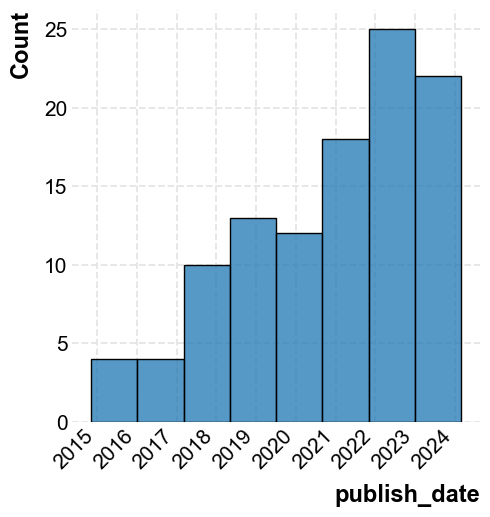

In [2]:
sns.displot(df_doi_first, x="publish_date")
_ = plt.xticks(rotation=45, ha="right")

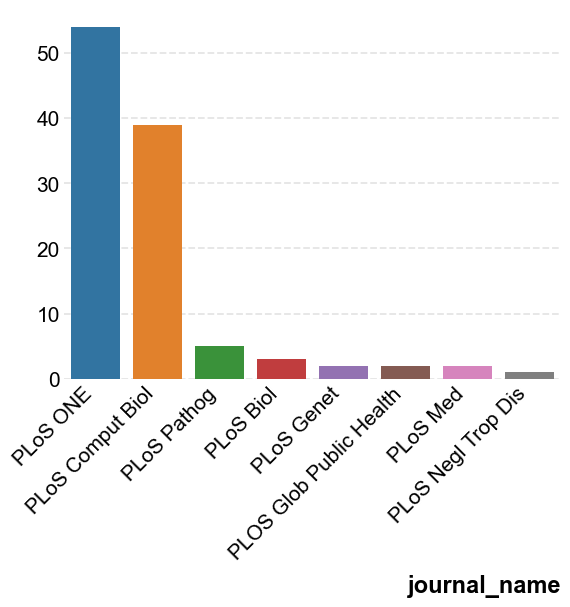

In [3]:
# Get counts of each journal name and sort by count
journal_counts = (
    df_doi_first["journal_name"].value_counts().sort_values(ascending=False)
)
sns.barplot(y=journal_counts.values, x=journal_counts.index, hue=journal_counts.index)
_ = plt.xticks(rotation=45, ha="right")

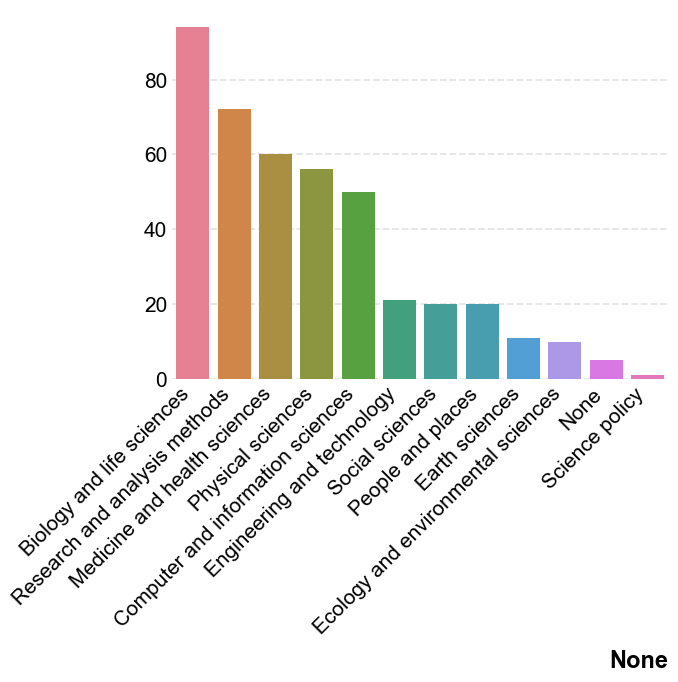

In [4]:
# Process disciplines by splitting by ";"
disc_counts: dict[str, int] = {}
for disc in df_doi_first["disciplines"]:
    if disc is None:
        disc_counts["None"] = disc_counts.get("None", 0) + 1
    else:
        for d in disc.split(";"):
            if d not in disc_counts:
                disc_counts[d] = 0
            disc_counts[d] += 1
discipline_counts = pd.Series(disc_counts).sort_values(ascending=False)


sns.barplot(
    x=discipline_counts.index, y=discipline_counts.values, hue=discipline_counts.index
)
_ = plt.xticks(rotation=45, ha="right")

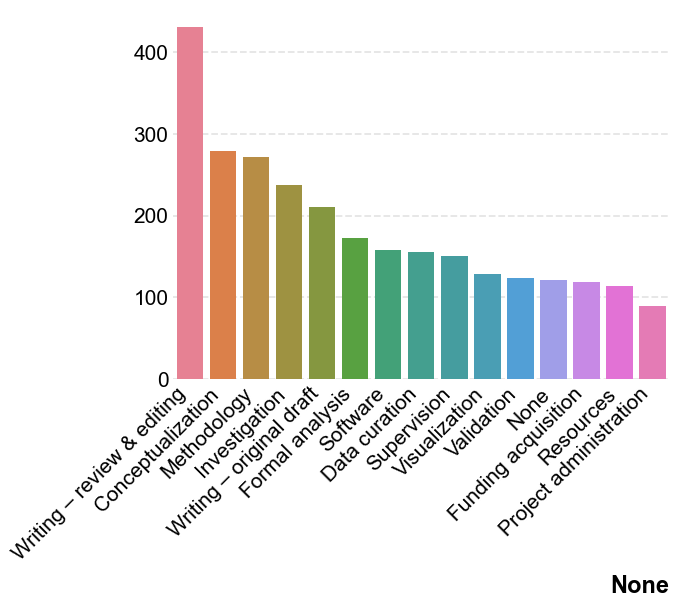

In [5]:
# Process roles by splitting by ";"
role_counts_dict = {}
for roles in df["roles"]:
    if roles is None:
        if "None" not in role_counts_dict:
            role_counts_dict["None"] = 0
        role_counts_dict["None"] += 1
    else:
        for r in roles.split(";"):
            if r not in role_counts_dict:
                role_counts_dict[r] = 0
            role_counts_dict[r] += 1
role_counts = pd.Series(role_counts_dict).sort_values(ascending=False)
sns.barplot(x=role_counts.index, y=role_counts.values, hue=role_counts.index)
_ = plt.xticks(rotation=45, ha="right")

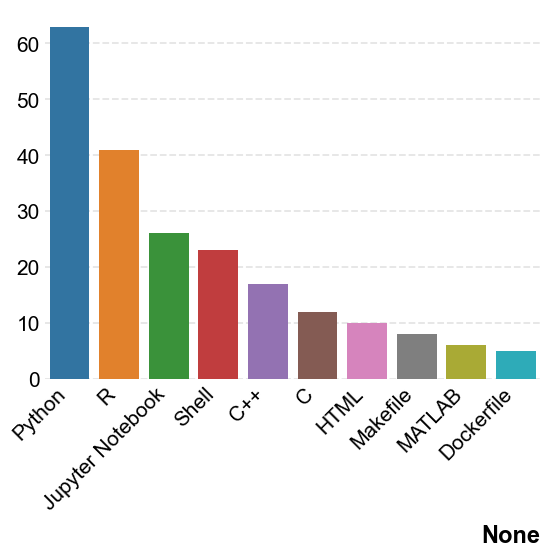

In [6]:
# Process repository_languages by first splitting by ";"
# (to get individual language and code count strings)
# and then by ":" (to get language and code counts)
lang_counts_dict = {}
for langs in df_doi_first["repository_languages"]:
    if langs is None:
        if "None" not in lang_counts_dict:
            lang_counts_dict["None"] = 0
        lang_counts_dict["None"] += 1
    else:
        for lang in langs.split(";"):
            if len(lang) == 0:
                continue
            lang, _ = lang.split(":")
            if lang not in lang_counts_dict:
                lang_counts_dict[lang] = 0
            lang_counts_dict[lang] += 1

lang_counts = pd.Series(lang_counts_dict).sort_values(ascending=False)[:10]
sns.barplot(x=lang_counts.index, y=lang_counts.values, hue=lang_counts.index)
_ = plt.xticks(rotation=45, ha="right")

<Axes: xlabel='author_dev_classification', ylabel='count'>

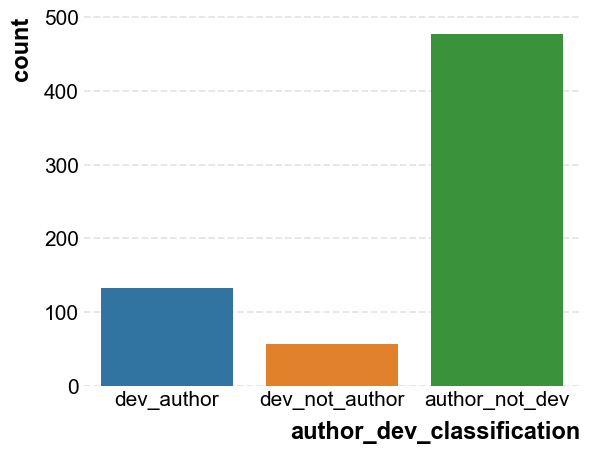

In [7]:
sns.countplot(df, x="author_dev_classification", hue="author_dev_classification")

In [10]:
# For each doi, get the rows from the dataframe
# and then display author info and dev info columns
for doi in np.random.choice(df["doi"].unique(), 5):
    group = df[df["doi"] == doi]
    group = group.rename(
        columns={
            "repository_contributor_name": "contrib_name",
            "repository_contributor_username": "contrib_username",
        }
    )
    print(
        group[
            [
                "full_name",
                "email",
                "contrib_username",
                "contrib_name",
                "author_dev_classification",
            ]
        ]
    )
    print()
    print()

                    full_name email contrib_username       contrib_name  \
483  Christian Steven Hoggard  None        CSHoggard  Christian Hoggard   
484             Benjamin Chan  None             None               None   
485     Juan Francisco Gibaja  None             None               None   
486      Virginia García-Díaz  None             None               None   
487          Niccolò Mazzucco  None             None               None   
488       Jake Thomas Rowland  None             None               None   
489          Annelou Van Gijn  None             None               None   

    author_dev_classification  
483                dev_author  
484            author_not_dev  
485            author_not_dev  
486            author_not_dev  
487            author_not_dev  
488            author_not_dev  
489            author_not_dev  


           full_name email contrib_username  contrib_name  \
37   Damien G. Hicks  None           hicksd  Damien Hicks   
38  Terence P. Spee